In [1]:
import torch

from shap_e.models.download import load_model
from shap_e.util.data_util import load_or_create_multimodal_batch
from shap_e.util.notebooks import create_pan_cameras, decode_latent_images,decode_latent_mesh, gif_widget

In [1]:
import torch

from shap_e.models.download import load_model
from shap_e.util.data_util import load_or_create_multimodal_batch
from shap_e.util.notebooks import create_pan_cameras, decode_latent_images,decode_latent_mesh, gif_widget
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
xm = load_model('transmitter', device=device)

model_path = "/home/yiftach/main/Research/shap-e/glbs/car.glb"

batch = load_or_create_multimodal_batch(
    device,
    model_path=model_path,
    mv_light_mode="basic",
    mv_image_size=256,
    cache_dir="car_dir",
    verbose=True, # this will show Blender output during renders
)
from PIL import Image


/home/yiftach/main/Research/shap-e/shap_e/examples/shap_e_model_cache
None is the location
creating point cloud...
Blender 3.4.1 (hash 55485cb379f7 built 2022-12-20 00:46:45)
Read prefs: /home/yiftach/.config/blender/3.4/config/userpref.blend
/run/user/1001/gvfs/ non-existent directory
activated gpu NVIDIA RTX A6000
activated gpu NVIDIA RTX A6000
Data are loaded, start creating Blender stuff
glTF import finished in 0.21s
GPU
Fra:1 Mem:118.08M (Peak 126.78M) | Time:00:00.05 | Syncing Light
Fra:1 Mem:118.08M (Peak 126.78M) | Time:00:00.05 | Syncing Light.001
Fra:1 Mem:118.08M (Peak 126.78M) | Time:00:00.05 | Syncing Sketchfab_model
Fra:1 Mem:118.08M (Peak 126.78M) | Time:00:00.05 | Syncing LIS
Fra:1 Mem:118.08M (Peak 126.78M) | Time:00:00.05 | Syncing KPZ
Fra:1 Mem:118.08M (Peak 126.78M) | Time:00:00.05 | Syncing KPZ_p4b
Fra:1 Mem:118.08M (Peak 126.78M) | Time:00:00.05 | Syncing 3DSMeshMatrix
Fra:1 Mem:118.09M (Peak 126.78M) | Time:00:00.05 | Syncing Object_5
Fra:1 Mem:118.18M (Peak 126.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


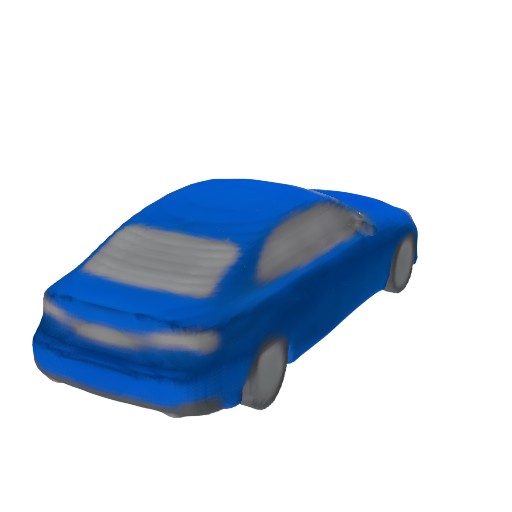

In [9]:
%reload_ext autoreload

%load_ext autoreload
%autoreload 2

from shap_e.util.notebooks import decode_latent_mesh,create_custom_cameras
size = 512
cameras = create_custom_cameras(size=size, device=device, azimuths=[30, 90, 150, 210, 270, 330], elevations=[20,-10]*3,fov_degrees=30,distance=2)
latent = xm.encoder.encode_to_bottleneck(batch)

with torch.no_grad():
    latent = xm.encoder.encode_to_bottleneck(batch)

    render_mode = 'stf' # you can change this to 'nerf'
    size = 512 # recommended that you lower resolution when using nerf

    decoder_output = decode_latent_images(xm, latent.float(), cameras, rendering_mode='stf')
    arr = decoder_output.clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
    images = [Image.fromarray(x) for x in arr]
    import os
#         # print(latent)
    # decoder_output = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    # arr = decoder_output.clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
#        images = [Image.fromarray(x) for x in arr]

#        im += images
    display(images[0])
    # # mesh.export("/home/yiftach/main/Research/shap-e/plane_enc.glb")
images[0].save("/home/yiftach/main/Research/shap-e/car_shap_e.png")
    # arr = mesh.clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
    # images = [Image.fromarray(x) for x in arr]
    # display(gif_widget(images))
    # # with open('plane.png', 'wb') as f:
    # #     images[0].save(f, format='PNG')

In [15]:
orig = Image.open('/home/yiftach/main/Research/shap-e/car/render_0000.png')
shap_e_car = Image.open('/home/yiftach/main/Research/shap-e/car_shap_e_rembg.png')
import numpy as np
orig_np = np.array(orig)
shap_e_car_np = np.array(shap_e_car)
orig_np_alpha = orig_np[:,:,3].astype(np.float32)
shap_e_car_np_alpha = shap_e_car_np[:,:,3].astype(np.float32)
orig_np_alpha /= 255
shap_e_car_np_alpha /= 255
orig_np_alpha.sum(), shap_e_car_np_alpha.sum()

(57240.6, 62073.066)